In [48]:
# Import libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [49]:
# Import Visual Relationship CSV file

df_visualize_relationship_original = pd.read_csv('../data/derived/combined_data_by_year.csv')
df_relationship = df_visualize_relationship_original.copy()

df_relationship.head()

,Unnamed: 0,year,country_id,country_txt_wb,country_txt_gtd,country_code,region,region_txt,arrivals,population,...,nkill_total,nkillus_total,nkillte_total,nwound_total,nwoundus_total,nwoundte_total,nvictim_total,nvictimus_total,nvictimte_total,incident_ct_total
0,0,2012,5,Albania,NaN,ALB,NaN,NaN,3156000,2900401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,2012,6,Algeria,Algeria,DZA,10.0,Middle East & North Africa,2634000,37383887,...,25.0,0.0,2.0,76.0,0.0,0.0,101.0,0.0,2.0,27
2,2,2012,7,Andorra,NaN,AND,NaN,NaN,2238000,82427,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,2012,8,Angola,NaN,AGO,NaN,NaN,528000,25107931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,2012,10,Antigua and Barbuda,NaN,ATG,NaN,NaN,247000,90409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [50]:
# Manipulate data for visualization

df_relationship = df_relationship.rename(columns={"year": "year_gtd"})

cols_keep = ['year_gtd', 'country_id', 'country_txt_wb', 'tourism_rank_2012', 'tourism_group', 
             'incident_ct_total', 'arrivals']
df_relationship = df_relationship[cols_keep]

# Calculate arrivals annual change in the following year

df_relationship = df_relationship.assign(arrivals_change_pct=df_relationship.groupby(['country_id'])
            .arrivals.pct_change(periods=-1))
df_relationship['arrivals_change_pct'] = -1 + (1 / (1 + df_relationship['arrivals_change_pct']))

# Set sort order

cols_keep = ['year_gtd', 'country_id', 'country_txt_wb', 'tourism_rank_2012', 'tourism_group', 
             'incident_ct_total', 'arrivals', 'arrivals_change_pct']

#df_relationship.sort_values(by=cols_keep)
# df_relationship = df_relationship[(df_relationship['country_txt_wb'] == "United States") |
#                                   (df_relationship['country_txt_wb'] == "Mali")]

df_relationship.head()

,year_gtd,country_id,country_txt_wb,tourism_rank_2012,tourism_group,incident_ct_total,arrivals,arrivals_change_pct
0,2012,5,Albania,57,NaN,0,3156000,-0.094740
1,2012,6,Algeria,65,NaN,27,2634000,0.037585
2,2012,7,Andorra,73,NaN,0,2238000,0.040214
3,2012,8,Angola,113,NaN,0,528000,0.231061
4,2012,10,Antigua and Barbuda,127,NaN,0,247000,-0.016194


In [51]:
# Create High and Low Tourism dfs

df_high = df_relationship[df_relationship['tourism_group'] == 'high'].dropna()
df_low = df_relationship[df_relationship['tourism_group'] == 'low'].dropna()
df_all = df_relationship.dropna(subset = ['arrivals_change_pct'])

#print(df_relationship['arrivals_change_pct'].mean())
#df_high.head()
df_low.head()

,year_gtd,country_id,country_txt_wb,tourism_rank_2012,tourism_group,incident_ct_total,arrivals,arrivals_change_pct
30,2012,46,Comoros,153,low,0,22800,-0.039474
38,2012,57,Dominica,146,low,0,79000,-0.012658
77,2012,114,Liechtenstein,147,low,0,62400,-0.044872
86,2012,123,Mali,151,low,17,32000,0.781250
90,2012,132,Moldova,145,low,0,89000,0.074157


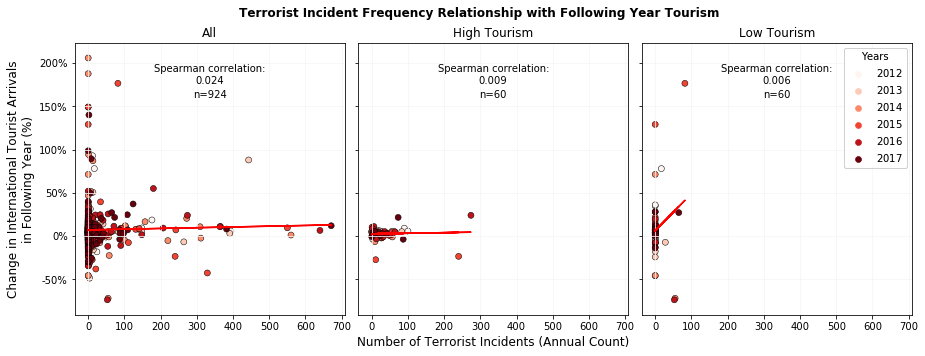

In [52]:
# Create Relationship visualization

# Set figure

fig, (ax3, ax1, ax2) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
fig.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Terrorist Incident Frequency Relationship with Following Year Tourism', fontsize=12, fontweight ="bold")

# Create plots

high_x = df_high['incident_ct_total']
high_y = df_high['arrivals_change_pct']
scatter1 = ax1.scatter(high_x, high_y, c=df_high['year_gtd'], cmap='Reds', 
            linewidths = .5, edgecolor ="black")
ax1.set_title('High Tourism')
ax1.grid(which='major', axis='both', c='whitesmoke')

low_x = df_low['incident_ct_total']
low_y = df_low['arrivals_change_pct']
scatter2 = ax2.scatter(low_x, low_y, c=df_low['year_gtd'], cmap='Reds',
            linewidths = .5, edgecolor ="black")
ax2.set_title('Low Tourism')
ax2.grid(which='major', axis='both', c='whitesmoke')

all_x = df_all['incident_ct_total']
all_y = df_all['arrivals_change_pct']
scatter3 = ax3.scatter(all_x, all_y, c=df_all['year_gtd'], cmap='Reds',
            linewidths = .5, edgecolor ="black")
ax3.set_title('All')
ax3.grid(which='major', axis='both', c='whitesmoke')

# Add best-fit line

m_high, b_high = np.polyfit(high_x, high_y, 1)
ax1.plot(high_x, m_high*high_x + b_high, color='red')

m_low, b_low = np.polyfit(low_x, low_y, 1)
ax2.plot(low_x, m_low*low_x + b_low, color='red')

m_all, b_all = np.polyfit(all_x, all_y, 1)
ax3.plot(all_x, m_all*all_x + b_all, color='red')

# Add Correlations

corr_high, pvalue_high = stats.spearmanr(high_x, high_y) 
#print('Spearmans correlation - High: %.3f' % corr_high)
n_high = len(df_high)

corr_low, pvalue_low = stats.spearmanr(low_x, low_y) 
#print('Spearmans correlation - Low: %.3f' % corr_low) 
n_low = len(df_low)

corr_all, pvalue_all = stats.spearmanr(all_x, all_y) 
#print('Spearmans correlation - All: %.3f' % corr_all) 
n_all = len(df_all)

# Add figure legend

legend2 = ax2.legend(*scatter2.legend_elements(), loc="best", title="Years")
ax2.add_artist(legend2)

# Add Axis Labels

ax1.set_xlabel('Number of Terrorist Incidents (Annual Count)', fontsize=12)

ax3.set_ylabel('Change in International Tourist Arrivals\nin Following Year (%)', fontsize=12)
ax3.set_yticklabels(['{:,.0%}'.format(x) for x in (ax3.get_yticks())])

# Add text annotations

ax1.annotate('Spearman correlation:\n%.3f' % corr_high, 
        xy=(0.1, 0.1), xycoords='axes fraction', xytext=(0.5, 0.85),
        textcoords='axes fraction', horizontalalignment='center', fontsize=10)
ax1.annotate('n=%.0f' % n_high, 
        xy=(0.1, 0.1), xycoords='axes fraction', xytext=(0.5, 0.80),
        textcoords='axes fraction', horizontalalignment='center', fontsize=10)

ax2.annotate('Spearman correlation:\n%.3f' % corr_low,
        xy=(0.1, 0.1), xycoords='axes fraction', xytext=(0.5, 0.85),
        textcoords='axes fraction', horizontalalignment='center', fontsize=10)
ax2.annotate('n=%.0f' % n_low, 
        xy=(0.1, 0.1), xycoords='axes fraction', xytext=(0.5, 0.80),
        textcoords='axes fraction', horizontalalignment='center', fontsize=10)

ax3.annotate('Spearman correlation:\n%.3f' % corr_all,
        xy=(0.1, 0.1), xycoords='axes fraction', xytext=(0.5, 0.85),
        textcoords='axes fraction', horizontalalignment='center', fontsize=10)
ax3.annotate('n=%.0f' % n_all, 
        xy=(0.1, 0.1), xycoords='axes fraction', xytext=(0.5, 0.80),
        textcoords='axes fraction', horizontalalignment='center', fontsize=10)

#ax3.set_xlim(xmin=0, xmax=100)

plt.show()